In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rand
import warnings
import os
warnings.filterwarnings("ignore") 

### 4b
#### Given the following data: The principal amount (i.e., the total loan) is P = $420,000, the annual interest rate is 6.75%(This needs to be converted into the monthly rate (6.75/12)%), and the loan is to be paid off in 15 years (equivalent to 180 months). Use the above-derived formula and these data to compute the monthly mortgage payment x by Python. The answer should be an amount ofmoney per month.

In [2]:
P = 420_000
r = 0.0675*12
n = 180
x = (r*P*(1+r)**n)/(((1+r)**n)-1)
print(f"Monthly mortage payment to pay off $420,000 loan in 15 years: ${x:,.0f}")

Monthly mortage payment to pay off $420,000 loan in 15 years: $340,200


### 4c
#### If the annual interest rate is reduced to 6.25% in the above data in Part (b), but the pay-off period is still 15 years, what is the monthly mortgage payment?

In [3]:
P = 420_000
r = 0.0625*12
n = 180
x = (r*P*(1+r)**n)/(((1+r)**n)-1)
print(f"Monthly mortage payment to pay off $420,000 loan in 15 years: ${x:,.0f}")

Monthly mortage payment to pay off $420,000 loan in 15 years: $315,000


### 4d
#### If the principal is increased to P = $480,000, the annual interest rate is 6.75%, and the loan period is changed to 30 years, what is the monthly mortgage payment now?

In [4]:
P = 480_000
r = 0.0675*12
n = 360
x = (r*P*(1+r)**n)/(((1+r)**n)-1)
print(f"Monthly mortage payment to pay off $480,000 loan in 30 years: ${x:,.0f}")

Monthly mortage payment to pay off $480,000 loan in 30 years: $388,800


### 5.i
#### Use Python to solve the following linear equations for x1, x2, x3, x4, x5:
\begin{cases}
-x_1 + 2x_2 + x_3 - x_4 + 2.1x_5 &= 1.3 \\
-2.5x_1 - 2.5x_2 + x_3 -1.9x_5 &= 1.1 \\
1.5x_1 - 3.5x_2 - 4x_3 - 3x_4 &= 0 \\
x_1 - x_2 - 5.1x_3 - 3.4x_4 &= 1.1 \\
x_1 + 2.6x_2 + 2x_3 - 2x_4 + 4.2x_5 &= -1.2 \\
\end{cases}
#### Keep only two decimal places in your answer.

In [5]:
#Solve system of equations by finding 'x' of the form Ax = b 
#Input elements from system of equations and reshape into 5x5 matrix
A = np.array([-1, 2, 1, -1, 2.1, -2.5, -2.5, 1, 0, -1.9,
             1.5, -3.5, -4, -3, 0, 1, -1, -5.1, -3.4, 0,
             1, 2.6, 2, -2, 4.2]).reshape(5,5, order='C')
#Input elements of 'b'
b = np.array([1.3, 1.1, 0, 1.1, -1.2])
x = np.linalg.solve(A,b)
#Create for loop to print solutions to two decimal places
#'enumerate' allows us to access elements of x and increment index numbers in loop
for j, i in enumerate(x):
    print(f"x{j+1} = {i:.2f}")
    j+=1

x1 = -1.32
x2 = -0.11
x3 = -0.89
x4 = 0.66
x5 = 0.83


### 5.ii
#### Use Python code and Monte Carlo simulation to approximately evaluate the area of a sphere of radius equal to 1.0 meters in 4-dimensional space. Note that this problem asks for the surface area of the surface of a 4-dimensional unit ball, not the volume of the entire solid 4-dimensional ball. You may solve this problem using the following steps

#### Step 1: Use many points, say N = 2, 000, 000 or more, and the Monte Carlo method to compute thevolume of the solid 4-dimensional ball or radius equal to 1.05 meters. This result is denoted by $V_{large}$.
#### Step 2: Use many points, say N = 2, 000, 000 or more, and the Monte Carlo method to compute the volume of the solid 4-dimensional ball or radius equal to 0.95. This result is denoted by $V_{small}$.
#### Step 3: Remove the smaller ball of radius equal to 0.95 meters from the larger ball of radius equal to1.05 meters. An empty spherical shell of thickness equal to 0.1 meters is formed. This shell’s volume is 
$$∆V = V_{large} − V_{small}$$ 
#### which should be equal to the spherical shell’s surface area A times the shell’s thickness which is 0.1meters.
#### Thus, the area of the 4-dimensional sphere is $$A = ∆V/0.1 [square meters]$$ 

In [6]:
#Number of simulations
N = 2_00_000
#Number of dimensions of ball
n = 4
#Random uniform distribution call
x = rand.uniform(low=-1, high=1, size=(N,n))
#Calculate the norm (length/magnitude) of each element of x
norms = np.linalg.norm(x, ord=2, axis=1)
#All the elements where the norm is less than the radius of the ball
k_large = len(np.where(norms < 1.05)[0])
k_small = len(np.where(norms < 0.95)[0])

V_large = (k_large/N)*2**n
V_small = (k_small/N)*2**n
dV = V_large - V_small

A = dV/0.1

#According to https://www.sjsu.edu/faculty/watkins/ndim.htm, the formula for surface area of a 4 dimensional is:
#A = 2pi^2r^3, where r is the radius
#So the area should be 2pi^2

print(f"Area of 4-dimension ball by simulation: {A} square meters")
print(f"A of 4-dimension ball by formula: {2*np.pi**2} square meters")

Area of 4-dimension ball by simulation: 19.363999999999997 square meters
A of 4-dimension ball by formula: 19.739208802178716 square meters


### 5.iii
#### Use the Monte Carlo method to approximately evaluate the following integral
$$\int_0^2 \frac{x^2 + 2e^{-3x^2}+8sin(2x)}{(x^4+5)(3+3x^2-2sin(x))}\ dx $$

In [7]:
f = lambda x: (x**2 + 2*np.exp(-3*x**2) + 8*np.sin(2*x))/((x**4 + 5)*(3 + 3*x**2 - 2*np.sin(x)))
x = rand.uniform(0,2, 1_000_000)
               
print(f"Monte Carlo integration of f(x) over [0, 2]: {(2-(0))*np.mean(f(x))}")

Monte Carlo integration of f(x) over [0, 2]: 0.5197910034571733


### 5.iv
#### Figure 3 shows the history time series of the global average temperature anomalies for June, December, and the Annual mean.

#### (a) Use Python and the dataset EarthTemperatureData.tex or EarthTemperatureData.csv to reproduce this figure (i.e., Figure 3 ). These two files have the same data, one in .txt and another in .csv. You can use either one. The data files EarthTemperatureData.tex and EarthTemperatureData.csv

In [8]:
os.chdir("/Users/vinceverdugo/Downloads/mathmodeling")
tempData = \
    pd.read_csv("EarthTemperatureData.csv",
                                   header=0, index_col=0)

In [9]:
junData = tempData.loc[:,'JUN']
decData = tempData.loc[:,'DEC']
annData = tempData.loc[:,'ANNUAL']

years = np.arange(1850,2016)

Text(0, 0.5, 'Temperature Anamoly (Degrees C)')

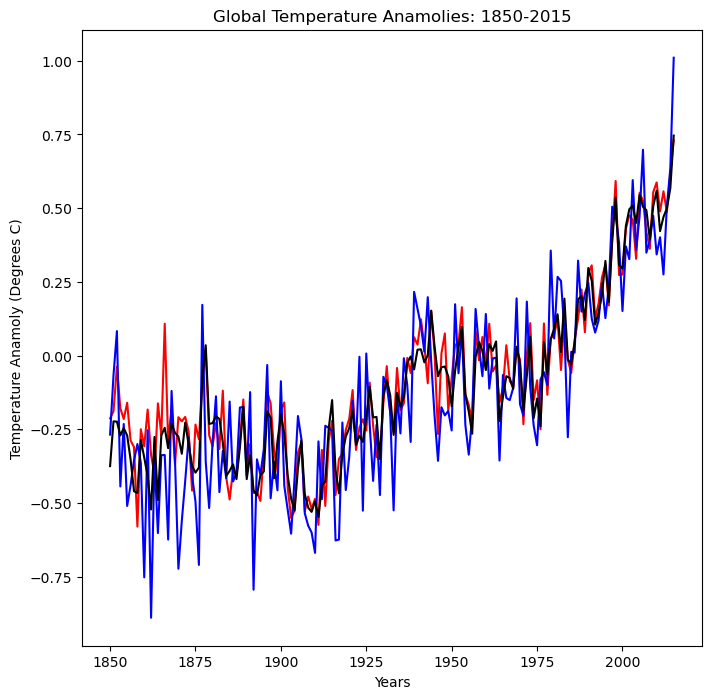

In [10]:
plt.figure(figsize=(8,8))
plt.plot(years, junData, 'r-')
plt.plot(years, decData, 'b-')
plt.plot(years, annData, 'k-')
plt.title("Global Temperature Anamolies: 1850-2015")
plt.xlabel("Years")
plt.ylabel("Temperature Anamoly (Degrees C)")

In [11]:
junMax = np.max(junData)
junMin = np.min(junData)
print(f"Hottest June anamoly: {junMax} degrees in {np.argmax(junData)+1850}")
print(f"Coldest June anamoly: {junMin} degrees in {np.argmin(junData)+1850}")

Hottest June anamoly: 0.73 degrees in 2015
Coldest June anamoly: -0.58 degrees in 1858


In [12]:
decMax = np.max(decData)
decMin = np.min(decData)
print(f"Hottest December anamoly: {decMax} degrees in {np.argmax(decData)+1850}")
print(f"Coldest December anamoly: {decMin} degrees in {np.argmin(decData)+1850}")

Hottest December anamoly: 1.01 degrees in 2015
Coldest December anamoly: -0.889 degrees in 1862


Comparing our results, we can see that June and December both had the hottest anamolies in 2015, their coldest anamolies happened 4 years apart in 1858 and 1862 respectively. By looking at our graph, we can see the largets spikes happen at the end of the graph, 2015. For June, it is hard to see in the graph but knowing the coldest June anamoly occured in 1858, we can conclude the graph matches. For December, it is very clear to see where the coldest anamoly occured and we can conclude it is in 1862. With the prior knowledge of global warming and its effects, we the graphs of our data follow that in recent years global temperatures have increased dramatically.